Segundo a fonte:

Até 30 de outubro de 2004, todos os preços médios eram calculados por média aritmética simples. **Após esta data, os preços médios de revenda e de distribuição de combustíveis, em nível estadual, regional e nacional, passaram a ser ponderados com base nas informações de vendas enviadas pelas distribuidoras à ANP.** Atualmente, apenas o preço médio em nível municipal é obtido por média aritmética simples.

***Portanto... Analisar apenas dados fornecidos a partir do dia 31/10/2004.***

Tipos de Produtos:
* Gasolina Comum
* Etanol Hidratado Combustível
* Óleo Diesel Não Aditivado
* Gás Natural Veicular (GNV)
* Gás Liquefeito de Petróleo (GLP – botijão de 13 quilos)
* Óleo diesel B S-10 <---> **Foi adicionado depois**

***Os valores NULL foram substituídos pelo valor -99999. Voltar para null para relizar o tratamento***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Abrindo a base de dados .csv
df_base= pd.read_csv(r'C:\Users\manus\OneDrive\Documentos\EDA_Projeto_Gas\base_2004_2021.csv')

In [3]:
#Realizando uma visualização geral dos dados
df_base.head(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


In [4]:
#Realizando uma visualização geral dos dados
df_base.tail(5)

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,2021-04-25,2021-05-01,NORTE,RORAIMA,OLEO DIESEL S10,12,R$/l,4.582,0.056,4.510,4.690,-99999.0,0.012,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,2021-04-25,2021-05-01,SUL,SANTA CATARINA,OLEO DIESEL S10,100,R$/l,4.141,0.187,3.838,4.739,-99999.0,0.045,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,2021-04-25,2021-05-01,SUDESTE,SAO PAULO,OLEO DIESEL S10,886,R$/l,4.246,0.216,3.769,5.199,-99999.0,0.051,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,2021-04-25,2021-05-01,NORDESTE,SERGIPE,OLEO DIESEL S10,33,R$/l,4.464,0.205,4.190,4.699,-99999.0,0.046,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,2021-04-25,2021-05-01,NORTE,TOCANTINS,OLEO DIESEL S10,18,R$/l,4.352,0.156,4.199,4.699,-99999.0,0.036,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


In [5]:
#Verificando as colunas existentes no dataset
df_base.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO'],
      dtype='object')

In [6]:
#Verificando o tamanho do nosso dataset
tamanho=df_base.shape
print(tamanho)

(120823, 18)


O Kaggle utiliza o -99999 para representar valores nulos. Portanto vamos transformá-los para null e então realizar nossa análise corretamente:

In [7]:
#Copiando o df_base para um novo df por segurança
df_new_base=df_base.copy()
df_new_base=df_new_base.replace({'-99999.0': np.NaN, '-99999': np.NaN, '-': np.NaN})

In [8]:
#Analisando os tipos de variáveis das colunas e se elas possuem valores vazios
df_new_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [9]:
#Contando a quantidade de vazios 
df_new_base.isnull().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

In [10]:
#Vendo a % que os vazios representam no dataset 
print(f'Representação de vazios no dataset: {np.round((8948/tamanho[0])*100,2)} %')

Representação de vazios no dataset: 7.41 %


Agora temos o valor real de valores nulos no nosso dataset e podemos comparar com o a dimensão de linhas do shape. Como a MARGEM MÉDIA REVENDA possui valores a mais nulos que as demais colunas com valores nulos, o ideal para este cenário é preenchê-los com a média ou mediana. Neste caso utilizaremos a mediana.

In [11]:
#Substituindo os valores vazios pela mediana
df_new_base["MARGEM MÉDIA REVENDA"].fillna(df_new_base["MARGEM MÉDIA REVENDA"].median(), inplace=True)
df_new_base["PREÇO MÉDIO DISTRIBUIÇÃO"].fillna(df_new_base["PREÇO MÉDIO DISTRIBUIÇÃO"].median(),inplace=True)
df_new_base["DESVIO PADRÃO DISTRIBUIÇÃO"].fillna(df_new_base["DESVIO PADRÃO DISTRIBUIÇÃO"].median(),inplace=True)
df_new_base["PREÇO MÍNIMO DISTRIBUIÇÃO"].fillna(df_new_base["PREÇO MÍNIMO DISTRIBUIÇÃO"].median(),inplace=True)
df_new_base["PREÇO MÁXIMO DISTRIBUIÇÃO"].fillna(df_new_base["PREÇO MÁXIMO DISTRIBUIÇÃO"].median(),inplace=True)
df_new_base["COEF DE VARIAÇÃO DISTRIBUIÇÃO"].fillna(df_new_base["COEF DE VARIAÇÃO DISTRIBUIÇÃO"].median(),inplace=True)

In [12]:
#Contando novamente a quantidade de vazios 
df_new_base.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

In [13]:
#Analisando a data, seria interessante trabalhar com o dia, mês e ano em colunas separadas para facilitar a análise.
#Novas colunas com o dia, mês e ano baseadas na coluna "DATA INICIAL" e "DATA FINAL"
dia_inicial=pd.DatetimeIndex(df_new_base['DATA INICIAL']).day
dia_final=pd.DatetimeIndex(df_new_base['DATA FINAL']).day

mes_inicial=pd.DatetimeIndex(df_new_base['DATA INICIAL']).month
mes_final=pd.DatetimeIndex(df_new_base['DATA FINAL']).month

ano_inicial=pd.DatetimeIndex(df_new_base['DATA INICIAL']).year
ano_final=pd.DatetimeIndex(df_new_base['DATA FINAL']).year

#Adicionando as colunas no DataFrame
df_new_base=df_new_base.assign(dia_inicial=dia_inicial, mes_inicial=mes_inicial, ano_inicial=ano_inicial, dia_final=dia_final, mes_final=mes_final, ano_final=ano_final)

In [14]:
df_new_base['DATA INICIAL'] = pd.to_datetime(df_new_base['DATA INICIAL'], format='%Y-%m-%d')

df=df_new_base.loc[(df_new_base['DATA INICIAL']>'2004-10-30')]
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,dia_inicial,mes_inicial,ano_inicial,dia_final,mes_final,ano_final
675,2004-10-31,2004-11-06,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,146,R$/l,1.632,0.088,1.27,...,0.127,0.9051,1.6527,0.102,31,10,2004,6,11,2004
676,2004-10-31,2004-11-06,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,378,R$/l,1.412,0.123,1.20,...,0.091,0.87301,1.4579,0.083,31,10,2004,6,11,2004
677,2004-10-31,2004-11-06,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,195,R$/l,1.692,0.091,1.45,...,0.077,1.05,1.6271,0.059,31,10,2004,6,11,2004
678,2004-10-31,2004-11-06,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,172,R$/l,1.626,0.066,1.37,...,0.114,0.9467,1.46,0.093,31,10,2004,6,11,2004
679,2004-10-31,2004-11-06,NORDESTE,ALAGOAS,ETANOL HIDRATADO,98,R$/l,1.479,0.053,1.36,...,0.077,1.0502,1.4047,0.059,31,10,2004,6,11,2004


In [15]:
#Plotando o Gráfico por Região
'''x_regiao=np.unique(df_new_base['REGIÃO'])
y_regiao=df_new_base.groupby(['REGIÃO'])['PREÇO MÉDIO REVENDA'].mean()

fig, ax = plt.subplots()
ax.barh(x_regiao, y_regiao)
ax.set_title('Preço Médio de Revenda (R$/l) por Região')
for i, value in enumerate(y_regiao):
    ax.text(value, i, str(np.round(value,2)))
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin, 1.1*xmax)
plt.show()'''

"x_regiao=np.unique(df_new_base['REGIÃO'])\ny_regiao=df_new_base.groupby(['REGIÃO'])['PREÇO MÉDIO REVENDA'].mean()\n\nfig, ax = plt.subplots()\nax.barh(x_regiao, y_regiao)\nax.set_title('Preço Médio de Revenda (R$/l) por Região')\nfor i, value in enumerate(y_regiao):\n    ax.text(value, i, str(np.round(value,2)))\nxmin, xmax = ax.get_xlim()\nax.set_xlim(xmin, 1.1*xmax)\nplt.show()"

In [16]:
#Estados com menor e maior preço por região
#df_new_base.groupby(['REGIÃO','ESTADO'])['PREÇO MÉDIO REVENDA'].min()

#df_new_base.groupby(['REGIÃO','ESTADO']).apply(lambda x: x.sort_values(['PREÇO MÉDIO REVENDA'], ascending = False))

#apply(lambda x: x.sort_values(["count_1"], ascending = False)
#df_new_base.groupby('ESTADO')['PREÇO MÉDIO REVENDA'].max()

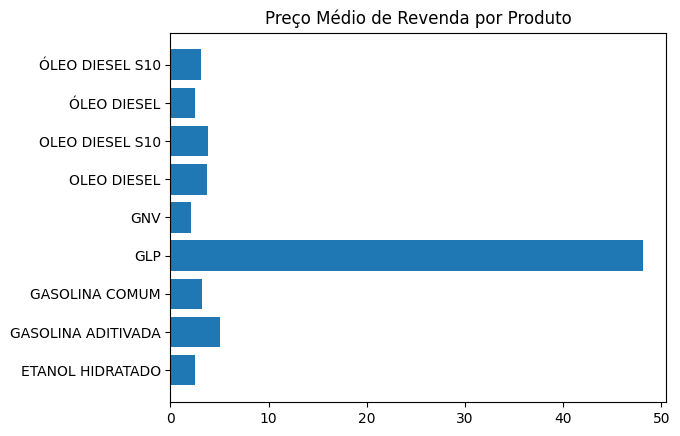

In [17]:
#Preço Médio de Revenda por Produto
x_produto=np.unique(df['PRODUTO'])
y_produto=df.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].mean()

plt.barh(x_produto, y_produto)
plt.title('Preço Médio de Revenda por Produto')
plt.show()

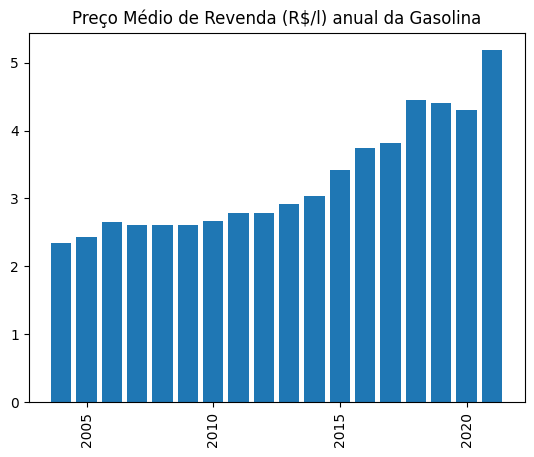

In [18]:
#Preço Médio de Revenda da Gasolina 
gasolina=df.loc[df['PRODUTO'] == 'GASOLINA COMUM']

x_produto=np.unique(gasolina['ano_inicial'])
y_produto=gasolina.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean()


plt.bar(x_produto,y_produto)
plt.xticks(rotation=90)
plt.locator_params(integer=True)
plt.title('Preço Médio de Revenda (R$/l) anual da Gasolina')
plt.show()

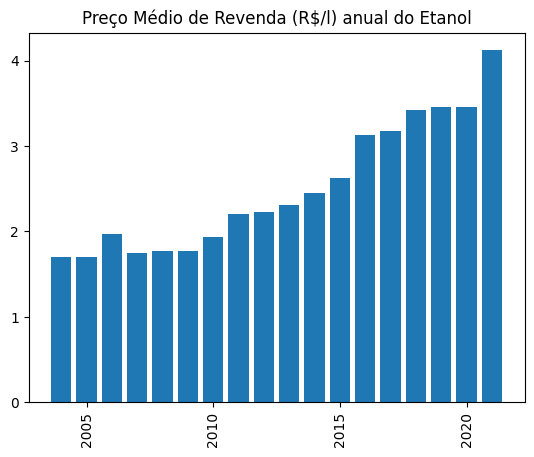

In [19]:
#Preço Médio de Revenda da Etanol 
etanol=df.loc[df['PRODUTO'] == 'ETANOL HIDRATADO']

x_produto=np.unique(etanol['ano_inicial'])
y_produto=etanol.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean()


plt.bar(x_produto,y_produto)
plt.xticks(rotation=90)
plt.locator_params(integer=True)
plt.title('Preço Médio de Revenda (R$/l) anual do Etanol')
plt.show()

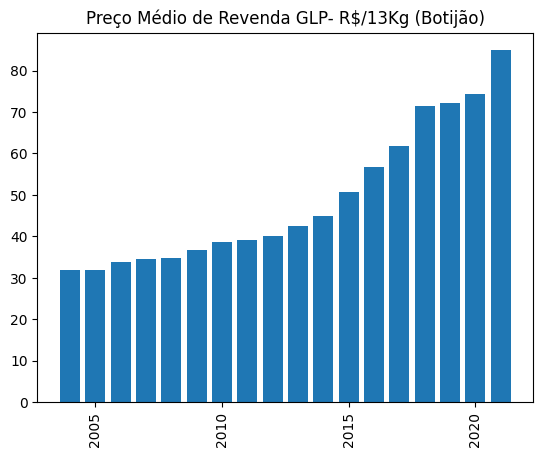

In [20]:
# Plotando o Preço Médio de Revenda Gás de Cozinha 

GLP=df.loc[df['PRODUTO'] == 'GLP']

x_produto=np.unique(GLP['ano_inicial'])
y_produto=GLP.groupby('ano_inicial')['PREÇO MÉDIO REVENDA'].mean()

#1 botijão 13 kg=31,5 l de GLP
plt.bar(x_produto,y_produto)
plt.xticks(rotation=90)
plt.locator_params(integer=True)
plt.title('Preço Médio de Revenda GLP- R$/13Kg (Botijão)')
plt.show()

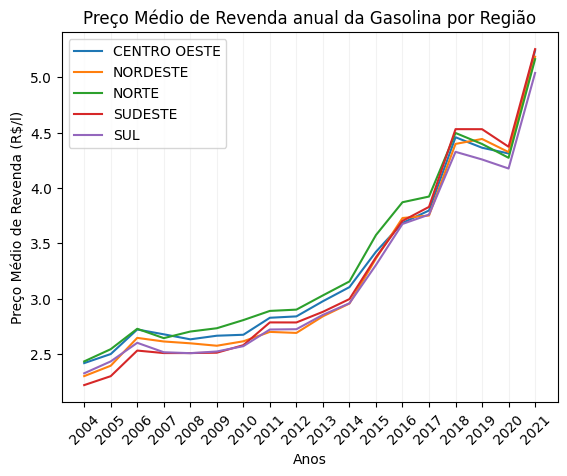

In [91]:
#Preço Médio de Revenda da Gasolina 
gasolina=df.loc[df['PRODUTO'] == 'GASOLINA COMUM']
anos=np.unique(df['ano_inicial'])

plt.plot(gasolina.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
plt.grid(axis='x', color='0.95')
plt.xticks(anos, rotation=45)
plt.xlabel('Anos')
plt.ylabel('Preço Médio de Revenda (R$/l)')
plt.legend()
plt.title('Preço Médio de Revenda anual da Gasolina por Região')
plt.show()

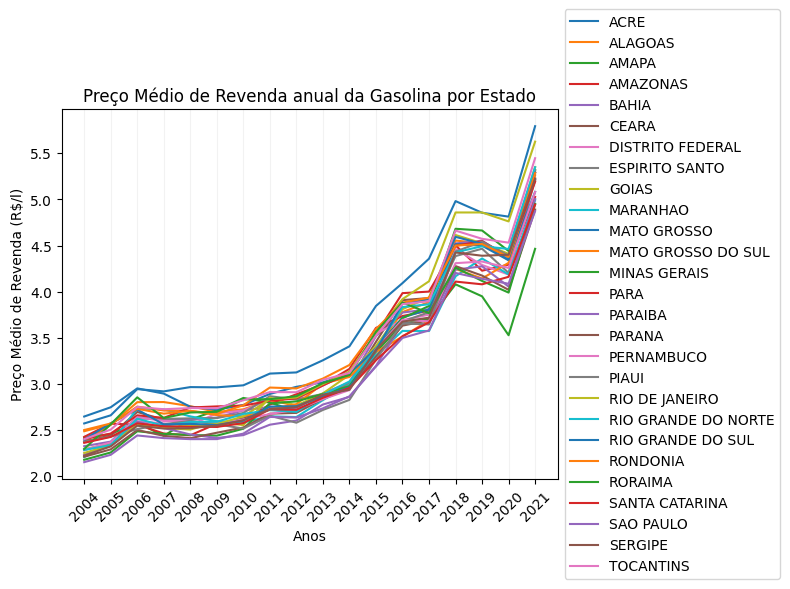

In [107]:
#Plotando o Preço Médio de Revenda do Gás de Cozinha por Estado
estados=np.unique(df['ESTADO'])
anos=np.unique(df['ano_inicial'])

#colormap = plt.cm.nipy_spectral
#colors = colormap(np.linspace(0, 1, len(estados)))

plt.plot(gasolina.groupby(['ESTADO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0),label=estados)
plt.grid(axis='x', color='0.95')
plt.xticks(anos, rotation=45)
plt.xlabel('Anos')
plt.ylabel('Preço Médio de Revenda (R$/l)')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Preço Médio de Revenda anual da Gasolina por Estado')
#ax.set_color_cycle([plt.cm.spectral(i) for i in np.linspace(0, 1, 27)])
plt.show()

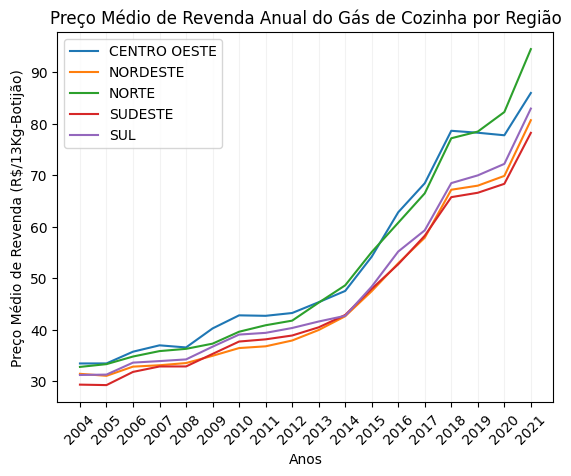

In [90]:
#Plotando o Preço Médio de Revenda do Gás de Cozinha por Região
regioes=np.unique(df['REGIÃO'])
anos=np.unique(df['ano_inicial'])

plt.plot(GLP.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
plt.grid(axis='x', color='0.95')
plt.xticks(anos, rotation=45)
plt.xlabel('Anos')
plt.ylabel('Preço Médio de Revenda (R$/13Kg-Botijão)')
plt.legend()
plt.title('Preço Médio de Revenda Anual do Gás de Cozinha por Região')
plt.show()

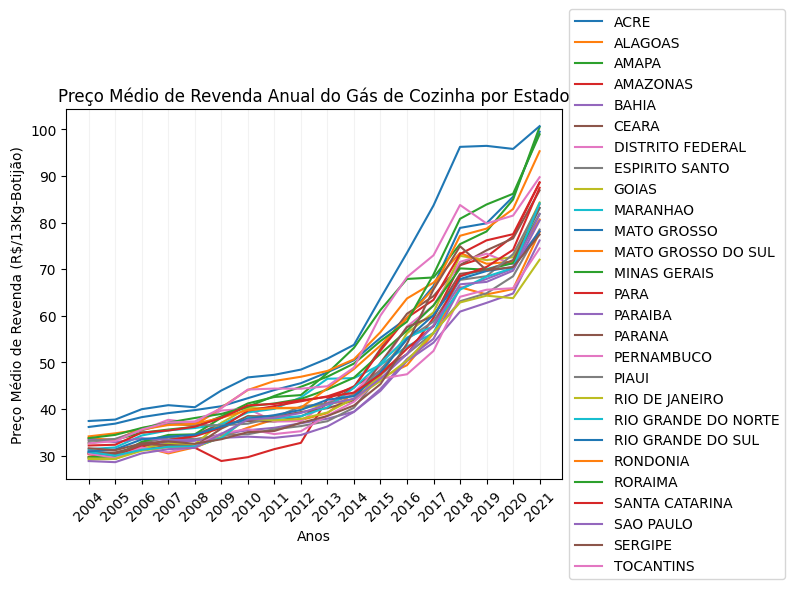

In [89]:
#Plotando o Preço Médio de Revenda do Gás de Cozinha por Estado
estados=np.unique(df['ESTADO'])
anos=np.unique(df['ano_inicial'])

plt.plot(GLP.groupby(['ESTADO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0),label=estados)
plt.grid(axis='x', color='0.95')
plt.xticks(anos, rotation=45)
plt.xlabel('Anos')
plt.ylabel('Preço Médio de Revenda (R$/13Kg-Botijão)')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Preço Médio de Revenda Anual do Gás de Cozinha por Estado')
plt.show()

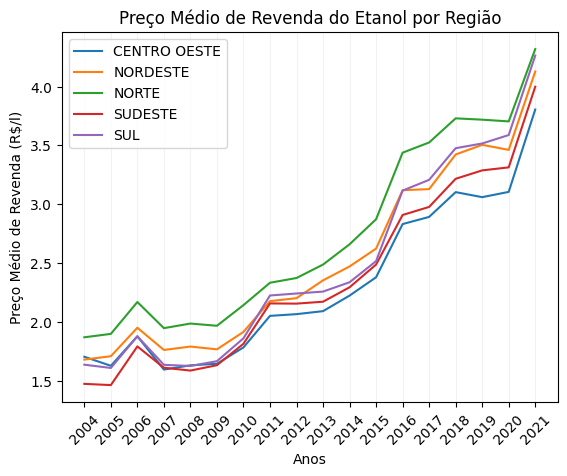

In [109]:
#Preço Médio de Revenda do Etanol 
etanol=df.loc[df['PRODUTO'] == 'ETANOL HIDRATADO']


plt.plot(etanol.groupby(['REGIÃO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0), label=regioes)
plt.grid(axis='x', color='0.95')
plt.xticks(anos, rotation=45)
plt.xlabel('Anos')
plt.ylabel('Preço Médio de Revenda (R$/l)')
plt.legend()
plt.title('Preço Médio de Revenda do Etanol por Região')
plt.show()

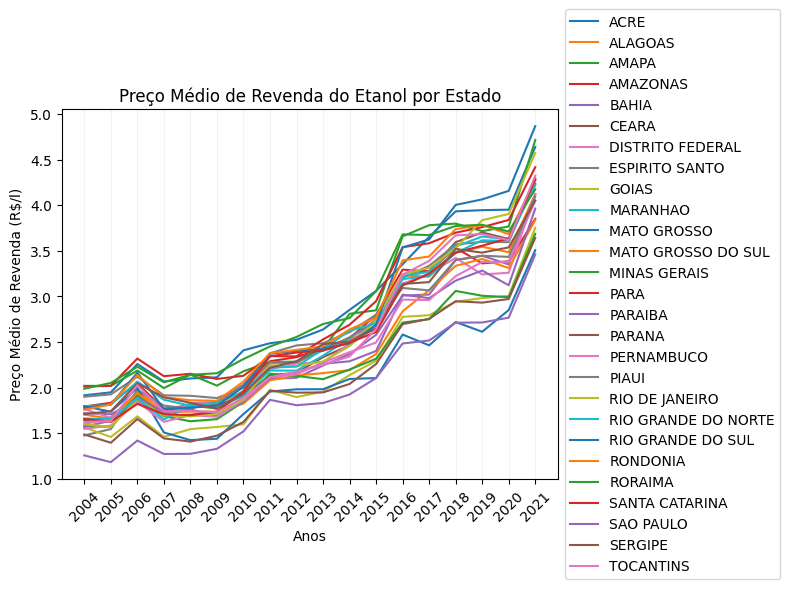

In [110]:
#Plotando o Preço Médio de Revenda do Gás de Cozinha por Estado
estados=np.unique(df['ESTADO'])
anos=np.unique(df['ano_inicial'])

plt.plot(etanol.groupby(['ESTADO','ano_inicial'])['PREÇO MÉDIO REVENDA'].mean().unstack(level=0),label=estados)
plt.grid(axis='x', color='0.95')
plt.xticks(anos, rotation=45)
plt.xlabel('Anos')
plt.ylabel('Preço Médio de Revenda (R$/l)')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Preço Médio de Revenda do Etanol por Estado')
plt.show()